<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** | Análise de Dados: Aprendizado de Máquina

Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Análise de Séries Temporais da Receita Municipal**

# 1\. Introdução

Neste código serão coletados de fontes públicas dados históricos da arrecadação do Município de Osasco com o objetivo de realizar análise de séries temporais.

Inicialmente serão feitas exploração, manipulação e visualização simples dos dados.

Após esses passos serão identificados os padrões das séries temporais com a decomposição dos componentes principais: tendência, sazonalidade e resíduos.

Os pacotes e bibliotecas principais a serem utilizados na análise são: pandas, seaborn, matplotlib e statsmodel.

---

# 2\. Instalação de Pacotes e Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# 3\. Coleta de Dados


Os dados originais estão disponíveis no link https://transparencia.tce.sp.gov.br/municipio/osasco . No entanto, os dados originais estão separados por ano.

No arquivo que será baixado no link a seguir, os dados de todos os anos já foram consolidados previamente em um único arquivo .csv. Foram acrescentados previamente aos dados originais as colunas Espécie de Receita, Categoria Econômica e Fonte de Recursos.

Além disso, os dados originais dos anos de 2014 a 2017 possuíam uma inconsistência: estavam sem marcador de casa decimal, o que fazia com que ficassem erroneamente multiplicados por 100. Esta inconsistência já foi solucionada previamente no arquivo a ser baixado.

In [ ]:
!wget -q https://raw.githubusercontent.com/moraesjoyces/Series-Temporais-Receitas/main/Series-Receita.csv

In [ ]:
receita_df = pd.read_csv('/content/Series-Receita.csv', delimiter=';',encoding='iso-8859-1')

# 4\. Exploração de Dados

In [ ]:
receita_df.head()

,Nome da Origem,id_rec_arrec_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,ds_poder,ds_fonte_recurso,ds_cd_aplicacao_fixo,...,ds_subcategoria,ds_fonte,ds_rubrica,ds_alinea,ds_subalinea,vl_arrecadacao,data_atualizacao,Espécie de Receita,Categoria Econômica,Fonte de Recurso
0,receitas-osasco-2014.csv,829548,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,310 - SAÚDE - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120200 - IMPOSTO SOBRE A PROPRIEDADE PREDIAL...,NaN,-25649,16/09/2015 12:23,IPTU,Receitas Correntes,TESOURO
1,receitas-osasco-2014.csv,829549,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,310 - SAÚDE - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120200 - IMPOSTO SOBRE A PROPRIEDADE PREDIAL...,NaN,27624841,16/09/2015 12:23,IPTU,Receitas Correntes,TESOURO
2,receitas-osasco-2014.csv,829550,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,05 - TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCU...,100 - GERAL TOTAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120434 - RETIDO NAS FONTES - OUTROS RENDIMENTOS,4704,16/09/2015 12:23,IR,Receitas Correntes,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS
3,receitas-osasco-2014.csv,829551,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,02 - TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINC...,261 - EDUCAÇÃO - FUNDEB - MAGISTÉRIO,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120431 - RETIDO NAS FONTES - TRABALHO,267258,16/09/2015 12:23,IR,Receitas Correntes,TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS
4,receitas-osasco-2014.csv,829552,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,110 - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120431 - RETIDO NAS FONTES - TRABALHO,556958,16/09/2015 12:23,IR,Receitas Correntes,TESOURO


In [ ]:
receita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20504 entries, 0 to 20503
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nome da Origem            20504 non-null  object
 1   id_rec_arrec_detalhe      20504 non-null  int64 
 2   ano_exercicio             20504 non-null  int64 
 3   ds_municipio              20504 non-null  object
 4   ds_orgao                  20504 non-null  object
 5   mes_referencia            20504 non-null  int64 
 6   mes_ref_extenso           20504 non-null  object
 7   ds_poder                  20504 non-null  object
 8   ds_fonte_recurso          20504 non-null  object
 9   ds_cd_aplicacao_fixo      20504 non-null  object
 10  ds_cd_aplicacao_variavel  20504 non-null  object
 11  ds_categoria              20504 non-null  object
 12  ds_subcategoria           20504 non-null  object
 13  ds_fonte                  20504 non-null  object
 14  ds_rubrica            

In [ ]:
receita_df.columns

Index(['Nome da Origem', 'id_rec_arrec_detalhe', 'ano_exercicio',
       'ds_municipio', 'ds_orgao', 'mes_referencia', 'mes_ref_extenso',
       'ds_poder', 'ds_fonte_recurso', 'ds_cd_aplicacao_fixo',
       'ds_cd_aplicacao_variavel', 'ds_categoria', 'ds_subcategoria',
       'ds_fonte', 'ds_rubrica', 'ds_alinea', 'ds_subalinea', 'vl_arrecadacao',
       'data_atualizacao', 'Espécie de Receita', 'Categoria Econômica',
       'Fonte de Recurso'],
      dtype='object')

In [ ]:
receita_df.shape

(20504, 22)

# 5\. Manipulação de Dados

## 5.1. Indexação

Serão concatenadas as colunas de mês e ano e ajustado o typecasting para ser possível realizar a indexação por tempo.

In [ ]:
receita_df['mes_arrecadacao'] = receita_df['mes_referencia'].apply(lambda x: f'{x:02d}') + '/' + receita_df['ano_exercicio'].astype(str)
receita_df['mes_arrecadacao'] = pd.to_datetime(receita_df['mes_arrecadacao'], format='%m/%Y')
receita_df = receita_df.set_index(keys=['mes_arrecadacao'])
receita_df.head()

,Nome da Origem,id_rec_arrec_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,ds_poder,ds_fonte_recurso,ds_cd_aplicacao_fixo,...,ds_subcategoria,ds_fonte,ds_rubrica,ds_alinea,ds_subalinea,vl_arrecadacao,data_atualizacao,Espécie de Receita,Categoria Econômica,Fonte de Recurso
mes_arrecadacao,,,,,,,,,,,,,,,,,,,,,
2014-01-01,receitas-osasco-2014.csv,829548,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,310 - SAÚDE - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120200 - IMPOSTO SOBRE A PROPRIEDADE PREDIAL...,NaN,-25649,16/09/2015 12:23,IPTU,Receitas Correntes,TESOURO
2014-01-01,receitas-osasco-2014.csv,829549,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,310 - SAÚDE - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120200 - IMPOSTO SOBRE A PROPRIEDADE PREDIAL...,NaN,27624841,16/09/2015 12:23,IPTU,Receitas Correntes,TESOURO
2014-01-01,receitas-osasco-2014.csv,829550,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,05 - TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCU...,100 - GERAL TOTAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120434 - RETIDO NAS FONTES - OUTROS RENDIMENTOS,4704,16/09/2015 12:23,IR,Receitas Correntes,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS
2014-01-01,receitas-osasco-2014.csv,829551,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,02 - TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINC...,261 - EDUCAÇÃO - FUNDEB - MAGISTÉRIO,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120431 - RETIDO NAS FONTES - TRABALHO,267258,16/09/2015 12:23,IR,Receitas Correntes,TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS
2014-01-01,receitas-osasco-2014.csv,829552,2014,Osasco,PREFEITURA MUNICIPAL DE OSASCO,1,janeiro,EXECUTIVO,01 - TESOURO,110 - GERAL,...,11000000 - RECEITA TRIBUTÁRIA,11100000 - IMPOSTOS,11120000 - IMPOSTOS SOBRE O PATRIMÔNIO E A RENDA,11120400 - IMPOSTO SOBRE A RENDA E PROVENTOS D...,11120431 - RETIDO NAS FONTES - TRABALHO,556958,16/09/2015 12:23,IR,Receitas Correntes,TESOURO


In [ ]:
receita_df.tail()

,Nome da Origem,id_rec_arrec_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,ds_poder,ds_fonte_recurso,ds_cd_aplicacao_fixo,...,ds_subcategoria,ds_fonte,ds_rubrica,ds_alinea,ds_subalinea,vl_arrecadacao,data_atualizacao,Espécie de Receita,Categoria Econômica,Fonte de Recurso
mes_arrecadacao,,,,,,,,,,,,,,,,,,,,,
2023-09-01,receitas-osasco-2023.csv,40939042,2023,Osasco,FUNDAÇÃO INSTITUTO TECNOLÓGICO DE OSASCO,9,Setembro,EXECUTIVO,04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA,110 - GERAL,...,16000000 - Receita de Serviços,16100000 - Serviços Administrativos e Comercia...,16110000 - Serviços Administrativos e Comercia...,16110100 - Serviços Administrativos e Comercia...,NaN,44204,NaN,Receita de Serviços,Receitas Correntes,OUTRAS FONTES DE RECURSOS
2023-09-01,receitas-osasco-2023.csv,40939043,2023,Osasco,FUNDAÇÃO INSTITUTO TECNOLÓGICO DE OSASCO,9,Setembro,EXECUTIVO,04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA,110 - GERAL,...,16000000 - Receita de Serviços,16900000 - Outros Serviços,16990000 - Outros Serviços,16999900 - Outros Serviços,NaN,15164,NaN,Receita de Serviços,Receitas Correntes,OUTRAS FONTES DE RECURSOS
2023-09-01,receitas-osasco-2023.csv,40939045,2023,Osasco,FUNDAÇÃO INSTITUTO TECNOLÓGICO DE OSASCO,9,Setembro,EXECUTIVO,04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA,220 - ENSINO FUNDAMENTAL - RECURSOS ESPECÍFICOS,...,16000000 - Receita de Serviços,16100000 - Serviços Administrativos e Comercia...,16110000 - Serviços Administrativos e Comercia...,16110100 - Serviços Administrativos e Comercia...,NaN,1000,NaN,Receita de Serviços,Receitas Correntes,OUTRAS FONTES DE RECURSOS
2023-09-01,receitas-osasco-2023.csv,40939046,2023,Osasco,FUNDAÇÃO INSTITUTO TECNOLÓGICO DE OSASCO,9,Setembro,EXECUTIVO,04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA,230 - ENSINO MÉDIO - RECURSOS ESPECÍFICOS,...,16000000 - Receita de Serviços,16100000 - Serviços Administrativos e Comercia...,16110000 - Serviços Administrativos e Comercia...,16110100 - Serviços Administrativos e Comercia...,NaN,242638,NaN,Receita de Serviços,Receitas Correntes,OUTRAS FONTES DE RECURSOS
2023-09-01,receitas-osasco-2023.csv,40939047,2023,Osasco,FUNDAÇÃO INSTITUTO TECNOLÓGICO DE OSASCO,9,Setembro,EXECUTIVO,04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA,230 - ENSINO MÉDIO - RECURSOS ESPECÍFICOS,...,16000000 - Receita de Serviços,16100000 - Serviços Administrativos e Comercia...,16110000 - Serviços Administrativos e Comercia...,16110100 - Serviços Administrativos e Comercia...,NaN,2800,NaN,Receita de Serviços,Receitas Correntes,OUTRAS FONTES DE RECURSOS


In [ ]:
receita_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20504 entries, 2014-01-01 to 2023-09-01
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nome da Origem            20504 non-null  object
 1   id_rec_arrec_detalhe      20504 non-null  int64 
 2   ano_exercicio             20504 non-null  int64 
 3   ds_municipio              20504 non-null  object
 4   ds_orgao                  20504 non-null  object
 5   mes_referencia            20504 non-null  int64 
 6   mes_ref_extenso           20504 non-null  object
 7   ds_poder                  20504 non-null  object
 8   ds_fonte_recurso          20504 non-null  object
 9   ds_cd_aplicacao_fixo      20504 non-null  object
 10  ds_cd_aplicacao_variavel  20504 non-null  object
 11  ds_categoria              20504 non-null  object
 12  ds_subcategoria           20504 non-null  object
 13  ds_fonte                  20504 non-null  object
 14  ds_ru

## 5.2. Visualização

A partir do dataframe base, será criado o dataframa arrecadacao_por_mes, onde será feito o agrupamento do valor arrecadado mensal para elaborar uma visualização simples que permita entender de forma geral o comportamento da série temporal.

In [ ]:
arrecadacao_por_mes = receita_df.reset_index()
arrecadacao_por_mes = arrecadacao_por_mes.groupby(arrecadacao_por_mes['mes_arrecadacao'])['vl_arrecadacao'].sum()
arrecadacao_por_mes

mes_arrecadacao
2014-01-01    188553042
2014-02-01    160464218
2014-03-01    158561391
2014-04-01    133189077
2014-05-01    137644526
                ...    
2023-05-01    391401826
2023-06-01    350926140
2023-07-01    363890783
2023-08-01    372848137
2023-09-01    365645074
Name: vl_arrecadacao, Length: 117, dtype: int64

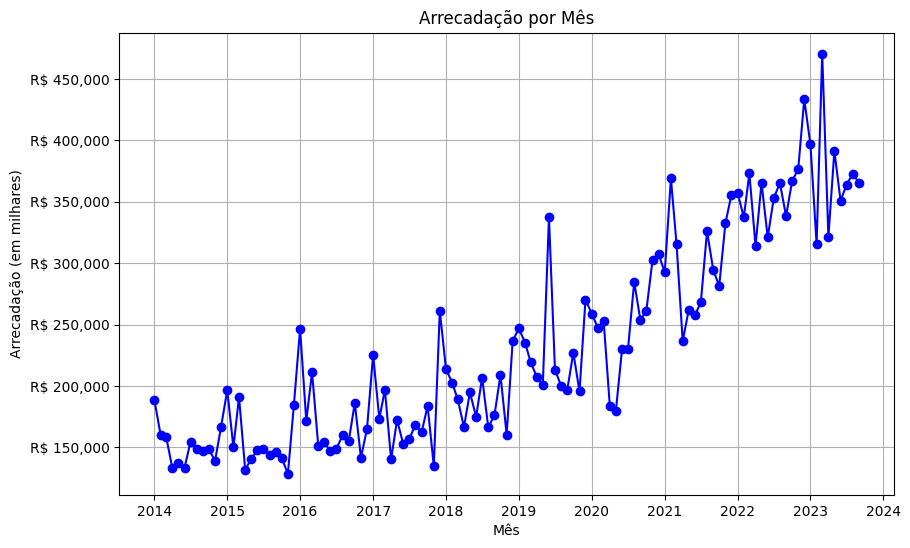

In [ ]:
def formatar_milhares(x, pos):
    return f'R$ {format(x/1000, ",.0f")}'
plt.figure(figsize=(10, 6))
plt.plot(arrecadacao_por_mes.index, arrecadacao_por_mes.values, marker='o', linestyle='-', color='b')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_milhares))
plt.title('Arrecadação por Mês')
plt.xlabel('Mês')
plt.ylabel('Arrecadação (em milhares)')
plt.grid(True)
plt.show()

# 6\. Análise dos Componentes

## 6.1. Por Fonte de Recurso

Serão analisados os componentes principais da Fonte de Recurso que representa a maior parcela da arrecadação: a do Tesouro, que são as receitas próprias, arrecadadas pelo esforço e potencial de arrecadação do Município.

In [ ]:
agrupado_por_fonte = receita_df.groupby(['mes_arrecadacao', receita_df['Fonte de Recurso']])['vl_arrecadacao'].sum().unstack()
agrupado_por_fonte

Fonte de Recurso,OPERAÇÕES DE CRÉDITO,OUTRAS FONTES DE RECURSOS,TESOURO,TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS
mes_arrecadacao,,,,,
2014-01-01,6225.0,9641755.0,76824944.0,83340011.0,18740107.0
2014-02-01,5867.0,11153892.0,74660525.0,64355900.0,10288034.0
2014-03-01,5739.0,11231924.0,72286372.0,60853817.0,14183539.0
2014-04-01,6211.0,9482331.0,58594167.0,53301373.0,11804995.0
2014-05-01,6596.0,9647877.0,62108153.0,54236425.0,11645475.0
...,...,...,...,...,...
2023-05-01,291374.0,50574814.0,273150425.0,50634020.0,16751193.0
2023-06-01,6283737.0,37715196.0,250095460.0,33421559.0,23410188.0
2023-07-01,283310.0,33538027.0,275369269.0,37027370.0,17672807.0


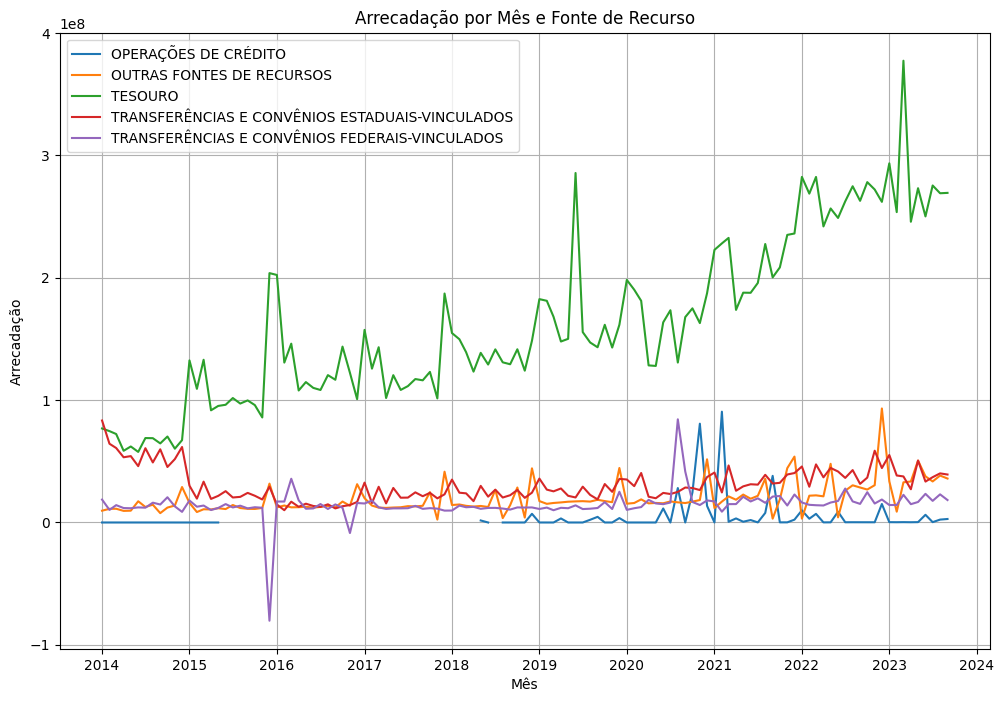

In [ ]:
plt.figure(figsize=(12, 8))
for coluna in agrupado_por_fonte.columns:
    plt.plot(agrupado_por_fonte.index, agrupado_por_fonte[coluna], label=coluna)


plt.title('Arrecadação por Mês e Fonte de Recurso')
plt.xlabel('Mês')
plt.ylabel('Arrecadação')
plt.grid(True)
plt.legend()
plt.show()

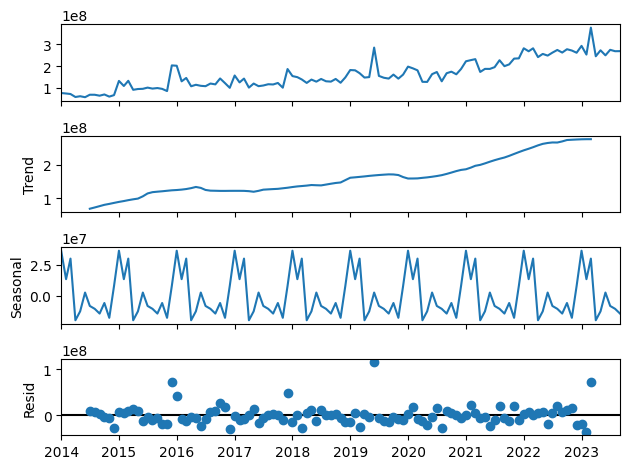

In [ ]:
result = sm.tsa.seasonal_decompose(agrupado_por_fonte[['TESOURO']], model='additive')
result.plot()
plt.show()

In [ ]:
tendencia = result.trend
residuo = result.resid
sazonalidade = result.seasonal

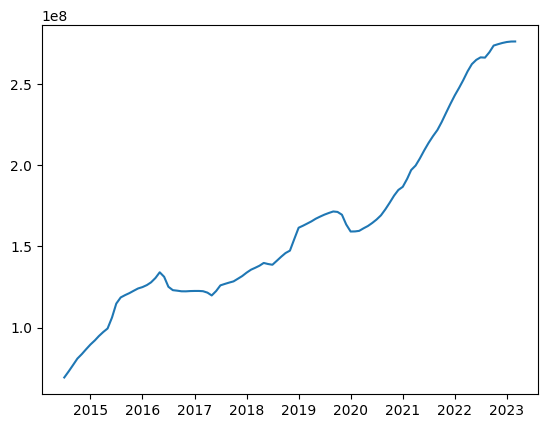

In [ ]:
plt.plot(tendencia)

O gráfico demonstra que as receitas próprias passaram por crescimento quase que constante; ao longo do período analisado podem ser observados poucos períodos de leve queda. A queda ocorrida no início de 2020 causada pela pandemia foi breve e seguida por um crescimento vertiginoso. Entretanto, em meados de 2022, observa-se que a tendência passou a ser de estabilização.

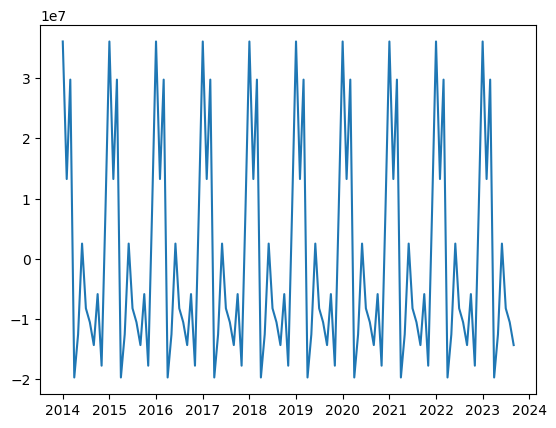

In [ ]:
plt.plot(sazonalidade)

plt.show()

O gráfico demonstra que o maior volume de receitas é arrecadado no período de novembro a março dos exercícios, sendo os demais meses de arrecadação muito menor, o que demanda a necessidade de reservar caixa para cobrir as despesas dos meses de menor arrecadação.

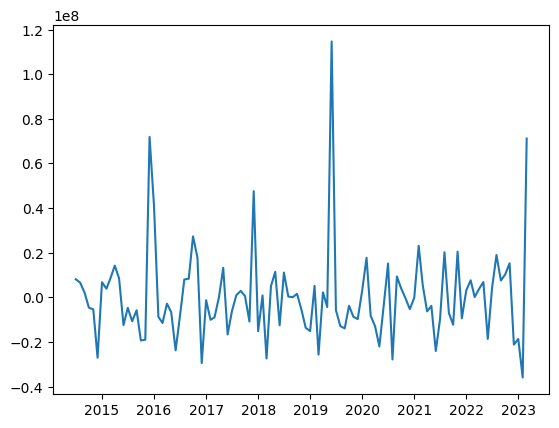

In [ ]:
plt.plot(residuo)
plt.show()

Os principais resíduos da série ocorreram nos anos de 2016 e 2019, quando ocorreram arrecadações de grande volume atípicas e pontuais, que não são explicadas pela tendência ou pela sazonalidade e não tiveram continuidade.

## 6.2. Por Espécie de Receita

Serão analisados os componentes principais da espécie que representa a maior parcela da arrecadação atualmente: o ISSQN (Imposto Sobre Serviços De Qualquer Natureza).

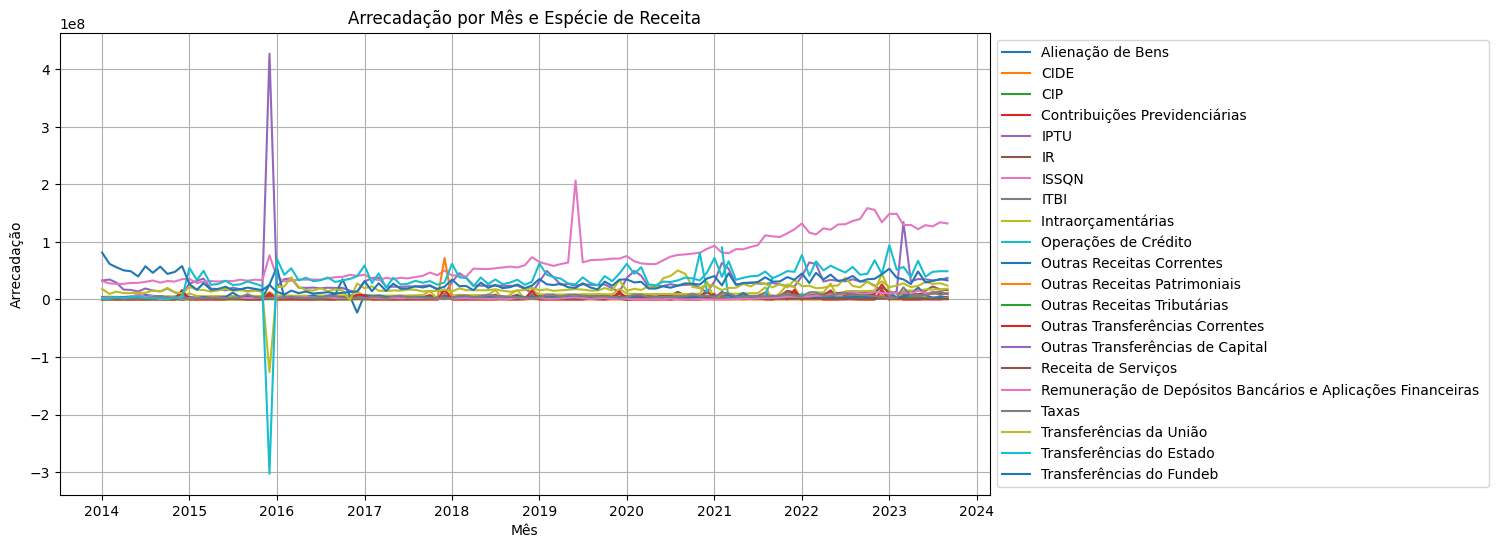

In [ ]:
agrupado_por_especie = receita_df.groupby(['mes_arrecadacao', receita_df['Espécie de Receita']])['vl_arrecadacao'].sum().unstack()

# Crie um gráfico de linha para cada categoria (ds_fonte_recurso)
plt.figure(figsize=(12, 6))
for coluna in agrupado_por_especie.columns:
    plt.plot(agrupado_por_especie.index, agrupado_por_especie[coluna], label=coluna)

plt.title('Arrecadação por Mês e Espécie de Receita')
plt.xlabel('Mês')
plt.ylabel('Arrecadação')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

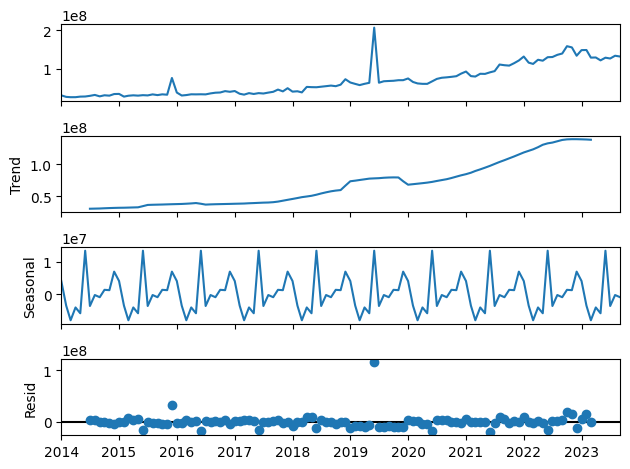

In [ ]:
result = sm.tsa.seasonal_decompose(agrupado_por_especie[['ISSQN']], model='additive')
result.plot()
plt.show()

In [ ]:
tendencia = result.trend
residuo = result.resid
sazonalidade = result.seasonal

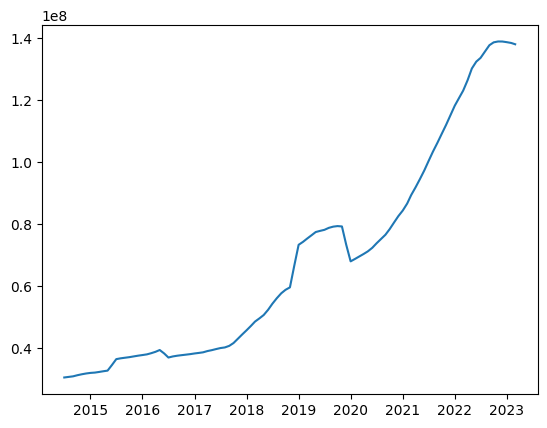

In [ ]:
plt.plot(tendencia)
plt.show()

A tendência do ISS, por ser a maior espécie de receitas próprias, é semelhante à tendência de arrecadação geral do Tesouro: crescimento quase que constante; poucos períodos de leve queda; breve queda ocorrida no início de 2020 causada pela pandemia seguida por um crescimento vertiginoso e estabilização a partir de meados de 2022.

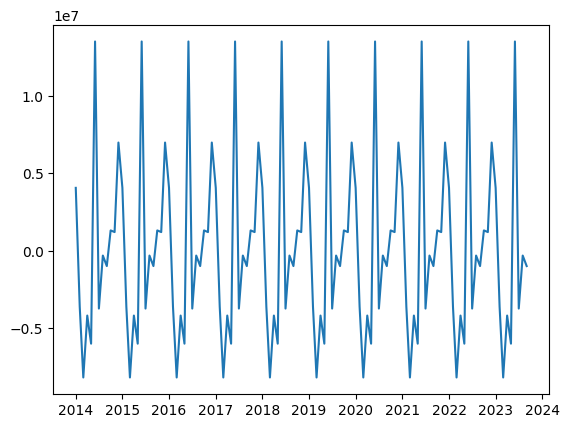

In [ ]:
plt.plot(sazonalidade)
plt.show()

O maior pico de arrecadação de ISS ocorre entre os meses de maio e junho e a menor arrecadação ocorre entre fevereiro e abril.

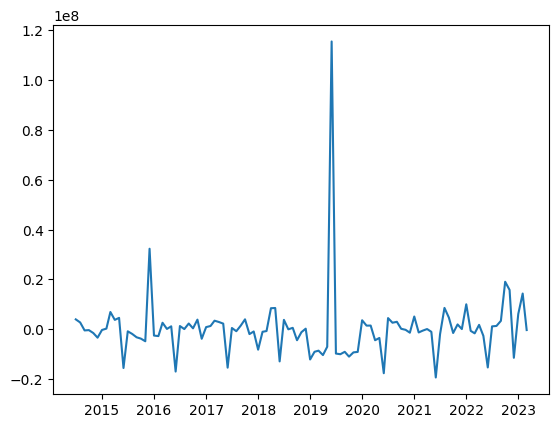

In [ ]:
plt.plot(residuo)
plt.show()

Resíduo similar ao das receitas próprias. Deve-se ao fato do ISS ser a maior espécie de receitas próprias.